<a href="https://colab.research.google.com/github/AbdullahAlTalaq/About-Me/blob/main/AlNoor10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Normalization

In [ ]:
import pandas as pd
df =pd.read_csv('/content/filtered_data.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Player  16 non-null     int64 
 1   Event   16 non-null     object
 2   X       16 non-null     int64 
 3   Y       16 non-null     int64 
 4   X2      16 non-null     object
 5   Y2      16 non-null     object
dtypes: int64(3), object(3)
memory usage: 896.0+ bytes


In [ ]:
df.loc[df['X2'] == '-', 'X2'] = df.loc[df['X2'] == '-', 'X']
df.loc[df['Y2'] == '-', 'Y2'] = df.loc[df['Y2'] == '-', 'Y']

In [ ]:
df['X2'] = df['X2'].astype('int64')
df['Y2'] = df['Y2'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Player  24 non-null     int64 
 1   Event   24 non-null     object
 2   X       24 non-null     int64 
 3   Y       24 non-null     int64 
 4   X2      24 non-null     int64 
 5   Y2      24 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.2+ KB


In [ ]:
# Define the pitch dimensions
pitch_width = 125
pitch_height = 100

for i in range(len(df)):
        df.at[i, 'X'] = int((df.at[i, 'X'] / 100) * pitch_width)
        df.at[i, 'Y'] = int((df.at[i, 'Y'] / 100) * pitch_height)
        df.at[i, 'X2'] = int((df.at[i, 'X2'] / 100) * pitch_width)
        df.at[i, 'Y2'] = int((df.at[i, 'Y2'] / 98) * pitch_height)

In [ ]:
pass_data = {'X': [], 'Y': []}
for i in range(len(df)):
    x_values = [df.at[i, 'X'], df.at[i, 'X2']]
    y_values = [df.at[i, 'Y'], df.at[i, 'Y2']]
    pass_data['X'].append(x_values)
    pass_data['Y'].append(y_values)


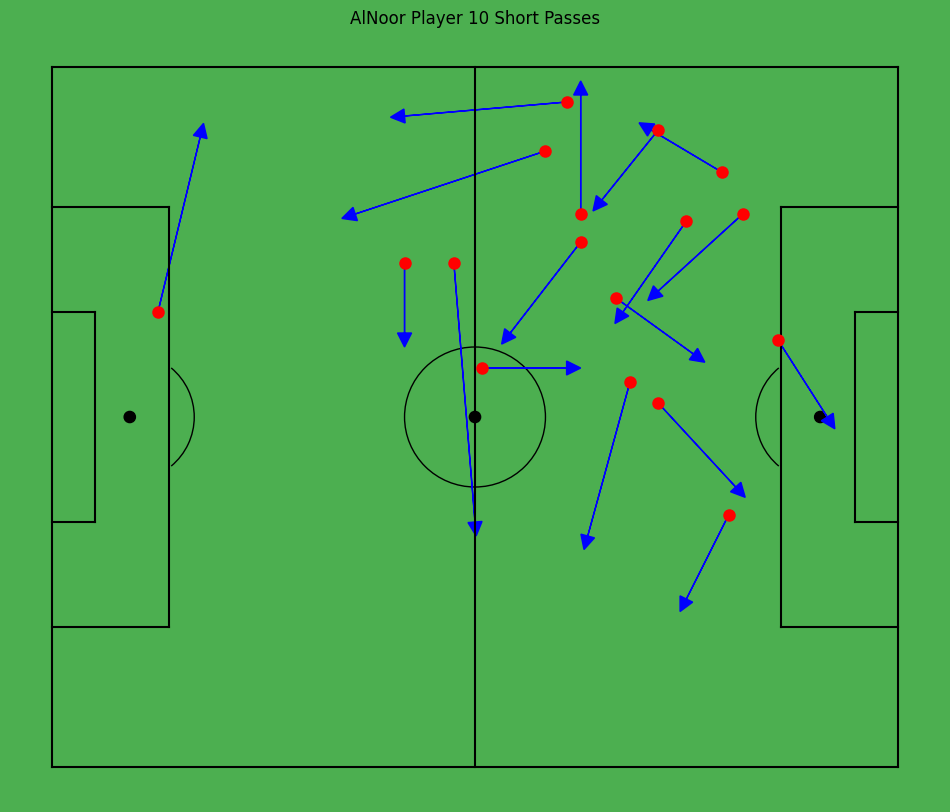

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
from scipy.ndimage import gaussian_filter  # Import gaussian_filter

# Create figure
fig = plt.figure()
fig.set_size_inches(12, 10)  # Set the figure size to match x=120 and y=100

# Pitch Outline & Centre Line
plt.plot([0, 0], [0, 100], color="black")
plt.plot([0, 120], [100, 100], color="black")
plt.plot([120, 120], [100, 0], color="black")
plt.plot([120, 0], [0, 0], color="black")
plt.plot([60, 60], [0, 100], color="black")

# Left Penalty Area (Reduced Size)
plt.plot([16.5, 16.5], [80, 20], color="black")
plt.plot([0, 16.5], [80, 80], color="black")
plt.plot([16.5, 0], [20, 20], color="black")

# Right Penalty Area (Reduced Size)
plt.plot([120, 103.5], [80, 80], color="black")
plt.plot([103.5, 103.5], [80, 20], color="black")
plt.plot([103.5, 120], [20, 20], color="black")

# Left 6-yard Box (Reduced Size)
plt.plot([0, 6], [65, 65], color="black")
plt.plot([6, 6], [65, 35], color="black")
plt.plot([6, 0], [35, 35], color="black")

# Right 6-yard Box (Reduced Size)
plt.plot([120, 114], [65, 65], color="black")
plt.plot([114, 114], [65, 35], color="black")
plt.plot([114, 120], [35, 35], color="black")

# Prepare Circles
centreCircle = plt.Circle((60, 50), 10.0, color="black", fill=False)  # Increased radius to 10.0
centreSpot = plt.Circle((60, 50), 0.8, color="black")
leftPenSpot = plt.Circle((11, 50), 0.8, color="black")
rightPenSpot = plt.Circle((109, 50), 0.8, color="black")

# Draw Circles
fig.gca().add_patch(centreCircle)
fig.gca().add_patch(centreSpot)
fig.gca().add_patch(leftPenSpot)
fig.gca().add_patch(rightPenSpot)

# Prepare Arcs
leftArc = Arc((11, 50), height=18.3, width=18.3, angle=0, theta1=310, theta2=50, color="black")
rightArc = Arc((109, 50), height=18.3, width=18.3, angle=0, theta1=130, theta2=230, color="black")

# Draw Arcs
fig.gca().add_patch(leftArc)
fig.gca().add_patch(rightArc)
fig.patch.set_facecolor('#4CAF50')
# Tidy Axes
plt.axis('off')


# Create a 2D histogram (heatmap) centered around pass data
#heatmap, xedges, yedges = np.histogram2d([x[0] for x in pass_data['X']], [y[0] for y in pass_data['Y']], bins=[120, 100], range=[[0, 120], [0, 100]])

# Smooth the heatmap data using gaussian_filter
#heatmap = gaussian_filter(heatmap, sigma=3)

# Plot the heatmap on the pitch
#plt.imshow(heatmap.T, cmap='hot', extent=[0, 120, 0, 100], origin='lower', alpha=0.7, interpolation='gaussian')

# Plot each pass as a separate line segment
for i in range(len(pass_data['X'])):
    start_x, start_y = pass_data['X'][i][0], 100-pass_data['Y'][i][0]
    end_x, end_y = pass_data['X'][i][1], 100-pass_data['Y'][i][1]
    plt.plot(start_x, start_y, 'o', color='red', markersize=8)  # Starting point
    plt.arrow(start_x, start_y, end_x - start_x, end_y - start_y, head_width=2, head_length=2, fc='blue', ec='blue')

# Add color bar for the heatmap
#cbar = plt.colorbar()
#cbar.set_label('Pass Density')
plt.title("AlNoor Player 10 Short Passes")
# Display the pitch with the heatmap and passes
plt.show()

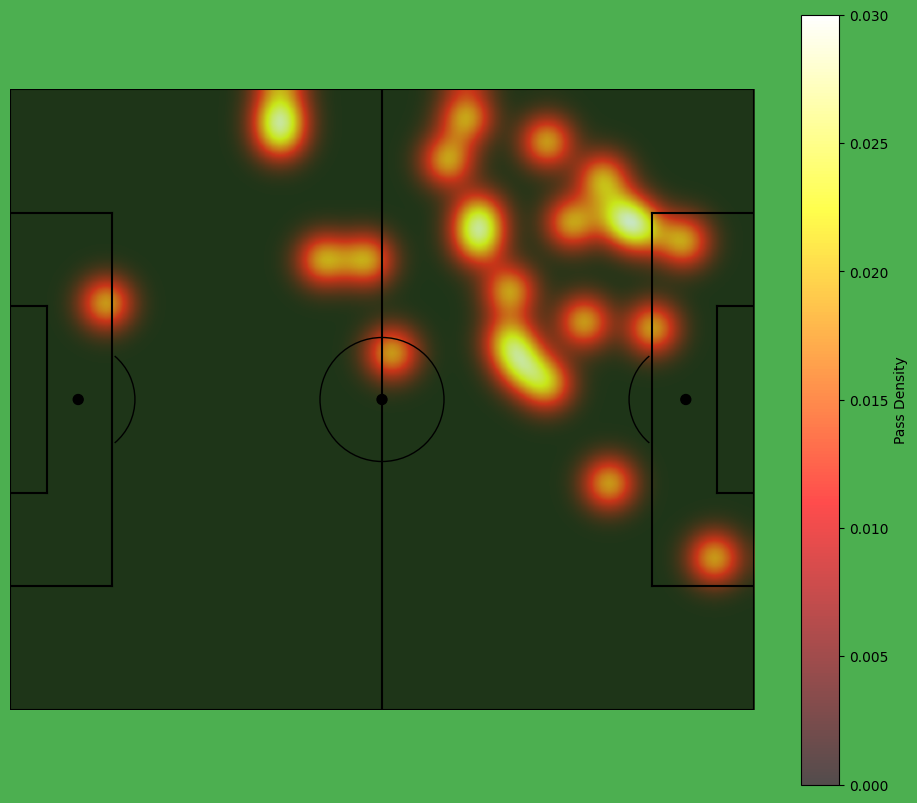

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
from scipy.ndimage import gaussian_filter  # Import gaussian_filter
import numpy as np

# Create figure
fig = plt.figure()
fig.set_size_inches(12, 10)  # Set the figure size to match x=120 and y=100

# Pitch Outline & Centre Line
plt.plot([0, 0], [0, 100], color="black")
plt.plot([0, 120], [100, 100], color="black")
plt.plot([120, 120], [100, 0], color="black")
plt.plot([120, 0], [0, 0], color="black")
plt.plot([60, 60], [0, 100], color="black")

# Left Penalty Area (Reduced Size)
plt.plot([16.5, 16.5], [80, 20], color="black")
plt.plot([0, 16.5], [80, 80], color="black")
plt.plot([16.5, 0], [20, 20], color="black")

# Right Penalty Area (Reduced Size)
plt.plot([120, 103.5], [80, 80], color="black")
plt.plot([103.5, 103.5], [80, 20], color="black")
plt.plot([103.5, 120], [20, 20], color="black")

# Left 6-yard Box (Reduced Size)
plt.plot([0, 6], [65, 65], color="black")
plt.plot([6, 6], [65, 35], color="black")
plt.plot([6, 0], [35, 35], color="black")

# Right 6-yard Box (Reduced Size)
plt.plot([120, 114], [65, 65], color="black")
plt.plot([114, 114], [65, 35], color="black")
plt.plot([114, 120], [35, 35], color="black")

# Prepare Circles
centreCircle = plt.Circle((60, 50), 10.0, color="black", fill=False)  # Increased radius to 10.0
centreSpot = plt.Circle((60, 50), 0.8, color="black")
leftPenSpot = plt.Circle((11, 50), 0.8, color="black")
rightPenSpot = plt.Circle((109, 50), 0.8, color="black")

# Draw Circles
fig.gca().add_patch(centreCircle)
fig.gca().add_patch(centreSpot)
fig.gca().add_patch(leftPenSpot)
fig.gca().add_patch(rightPenSpot)

# Prepare Arcs
leftArc = Arc((11, 50), height=18.3, width=18.3, angle=0, theta1=310, theta2=50, color="black")
rightArc = Arc((109, 50), height=18.3, width=18.3, angle=0, theta1=130, theta2=230, color="black")

# Draw Arcs
fig.gca().add_patch(leftArc)
fig.gca().add_patch(rightArc)
fig.patch.set_facecolor('#4CAF50')
# Tidy Axes
plt.axis('off')

# Updated pass_data with multiple passes as lists of lists (replace with your own data)


# Reflect the pass data along the y-axis
for i in range(len(pass_data['Y'])):
    pass_data['Y'][i] = [100 - x for x in pass_data['Y'][i]]

# Create a 2D histogram (heatmap) centered around pass data
heatmap, xedges, yedges = np.histogram2d([x[0] for x in pass_data['X']], [y[0] for y in pass_data['Y']], bins=[120, 100], range=[[0, 120], [0, 100]])

# Smooth the heatmap data using gaussian_filter
heatmap = gaussian_filter(heatmap, sigma=3)

# Plot the heatmap on the pitch
plt.imshow(heatmap.T, cmap='hot', extent=[0, 120, 0, 100], origin='lower', alpha=0.7, interpolation='gaussian')

# The passes are set as transparent (alpha=0) but still contribute to the heatmap
for i in range(len(pass_data['X'])):
    plt.plot(pass_data['X'][i], pass_data['Y'][i], 'o', color='red', markersize=0, alpha=0)  # Starting point
    plt.plot([pass_data['X'][i][0], pass_data['X'][i][1]], [pass_data['Y'][i][0], pass_data['Y'][i][1]], color='blue', linewidth=0, alpha=0)

# Add color bar for the heatmap
cbar = plt.colorbar()
cbar.set_label('Pass Density')

# Display the pitch with the heatmap (passes are invisible but contribute to the heatmap)

plt.show()

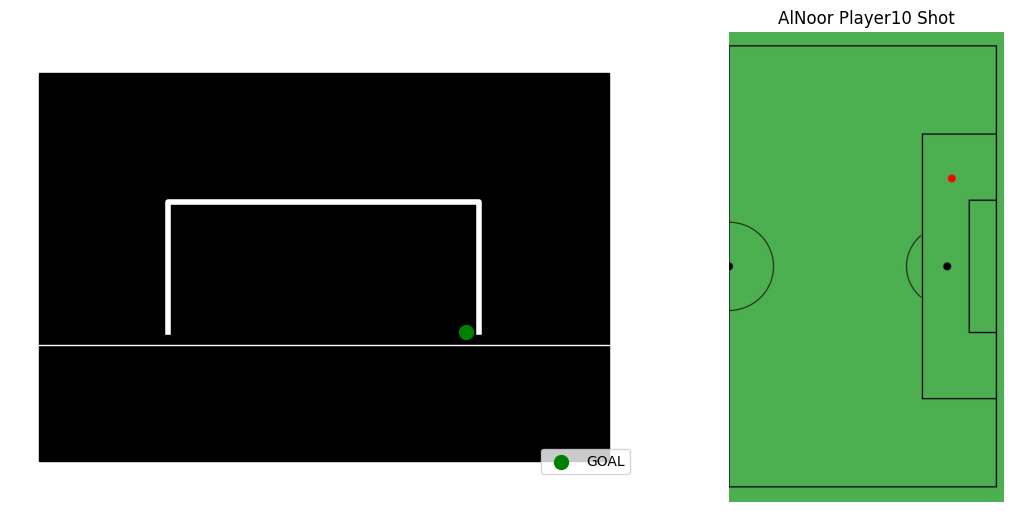

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with a subplot grid
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Define the goal dimensions
goal_width = 24
goal_height = 10
space_around_goal = 10  # Increased space around the goal

# Plot the background rectangle in the first subplot
axs[0].add_patch(plt.Rectangle((-space_around_goal, -space_around_goal),
                               goal_width + 2 * space_around_goal,
                               goal_height + 2 * space_around_goal,
                               color='black'))

axs[0].plot([0, 0, goal_width, goal_width], [0, goal_height, goal_height, 0], color='white', linewidth=4)

# Add vertical lines in the ground to represent the goal line in the first subplot
axs[0].plot([34, -10], [-1, -1], color='white', linewidth=1)

# Create example data points for shots, goals, and saves
shots = [(23, 0)]

# Plot shots, goals, and saves in the first subplot
axs[0].scatter(*zip(*shots), c='Green', marker='o', s=100, label='GOAL')

# Set the aspect ratio to be equal in the first subplot
axs[0].set_aspect('equal')

# Hide the x and y axes in the first subplot
axs[0].axis('off')

axs[0].legend(loc='lower right')

# Load an image
image_path = '/content/14.JPG'  # Replace with the path to your image

# Display the image in the second subplot
image = plt.imread(image_path)
axs[1].imshow(image)
axs[1].axis('off')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.title("AlNoor Player10 Shot")
plt.show()